# Seaborn - matrix and regression plots

In [1]:
import seaborn as sns
%matplotlib inline
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [2]:
flights.shape

(144, 3)

Let us pivot this flights data such that it becomes a 2D matrix. Lets make the Month as row indices

In [3]:
flights_pv = flights.pivot_table(index='month', columns='year', values='passengers')
flights_pv.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


Using `pivot_tables` we have also aggregated the data by month and years.

**ToC**
 - [Heatmap](#Heatmap)
 - [Cluster plot](#Cluster-plot)
 - [Regression Linear model plot](#Regression-linear-model-plot)

## Heatmap
Heatmaps are a great way to represent continually variying data. However, you need to run this on a matrix kind of dataset, one where the row indexes are values themselves instead of serials.

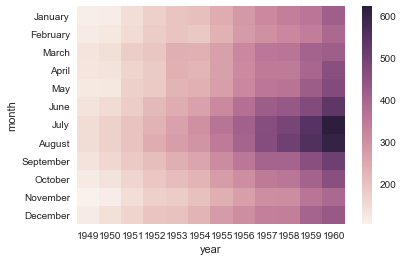

In [4]:
sns.heatmap(flights_pv)

From the heatmap above, we see there are more passengers in summer (June, July, August) and the number of passengers increases by the year as well.

### Heatmap for null data visualization
SNS Heatmap is great to view how many nulls are in your data.

In [2]:
#from ml chapter, read titanic data
import pandas as pd
titanic = pd.read_csv('../udemy_ml_bootcamp/Machine Learning Sections/Logistic-Regression/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.shape

(891, 12)

In [3]:
titanic.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


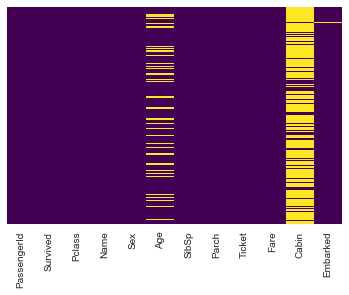

In [4]:
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

You can see `Age` and `Cabin` columns have lots of null while others have none or very few.

## Cluster plot
Cluster plots are useful to auto group datasets. More of this in machine learning section

/Users/atma6951/anaconda/envs/pychakras/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


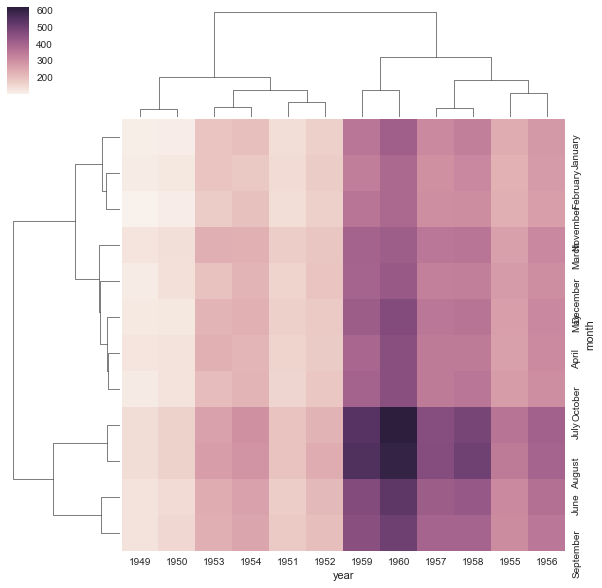

In [5]:
sns.clustermap(flights_pv)

Cluster map rearranges the data to show cells of similar values close by.

## Regression linear model plot
You can do regression plots in two ways. You can decorate a scatter plot to have a fit or you can make a regression plot with scatter on it. We will see the latter.

In [6]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


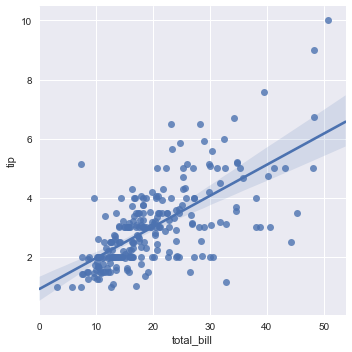

In [7]:
#regressin total bill to the tip
sns.lmplot(x='total_bill', y='tip', data=tips)

You can decorate this by splitting it by sex and assigning a different color for males and females

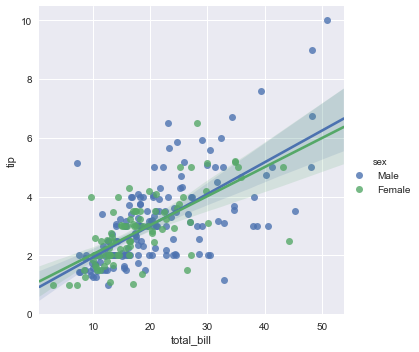

In [9]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')

You can bring in factors like day of week and create a regression for each day

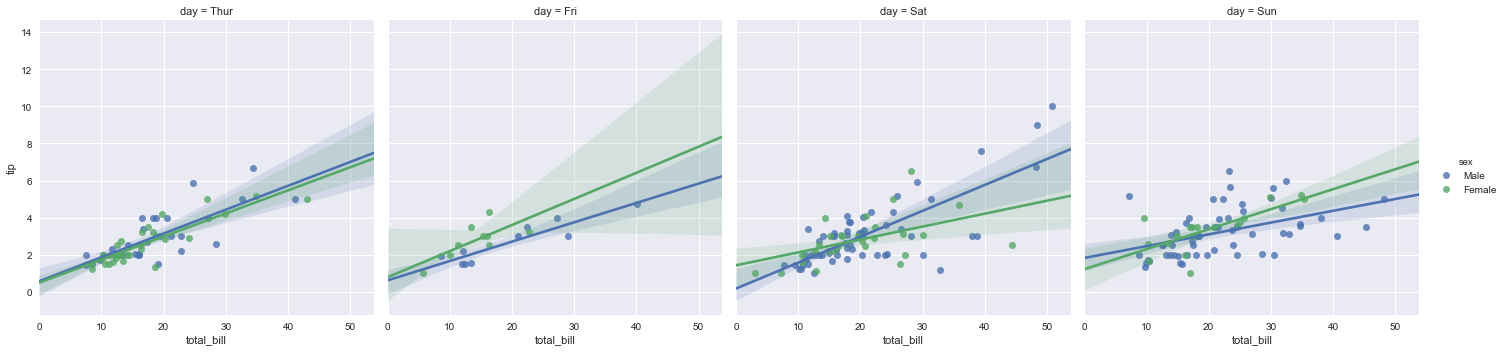

In [10]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', col='day')